# Projeto Machine Learning

**Objetivo**: Através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 mil por ano.

**Habilidades Avaliadas**: 
* Técnicas de Transformação e Preparação de dados
* Aplicação, Avaliação e Tunning de Modelos de Machine Learning para Classificação.

**Dataset**: O conjunto de dados para este projeto é originário do Repositório de Aprendizado de Máquina da UCI e pode ser visualizada [aqui](https://archive.ics.uci.edu/ml/datasets/Adult).

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
df = pd.read_csv('/home/amador/dados/adult.data')

## Conhecendo a Base de Dados

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,matital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,education-num,matital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
matital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
matital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

In [7]:
# Variáveis numéricas.
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Variáveis categóricas.
df.describe(include=['O'])

,workclass,education,matital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## Colunas do Dataset

**age**: Idade.

**workclass**: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

**education**: Níveis de Escolaridade.

**education-num**: Código do Nível de Escolaridade.

**marital-status**: Estado Civil.

**occupation**: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

**relationship**: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

**race**: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

**sex**: Sexo(Feminino, Masculino).

**capital-gain**: Ganho de Capital.

**capital-loss**: Perda de Capital.

**hours-per-week**: Horas de trabalho por Semana.

**native-country**: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc)

# Tarefas

####  <span style="color:Blue">  Análise Exploratória </span>
1) Faça análise exploratória na base de dados e tente responder as seguintes questões:

* **a)** Visualize a distribuição das classes (variável income).
* **b)** Visualize a distribuição das classes por Nível de Escolaridade.
* **c)** Visualize a relação (scatter) das colunas age,sex e race com a coluna income.

**Como fazer?**

Para isso, você precisa como pré-requisito o conhecimento de Python e Pandas que são mostrados nos capítulos **Dominando o Python** e **Python para Análise de Dados**. 

Nas aulas de Pandas assista principalmente a parte onde é exibida a integração com Matplotlib.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   matital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'matital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

**Agora**:
* "<=50K" = 0
*  ">50K" = 1

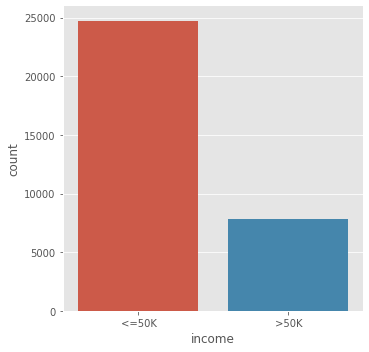

In [12]:
# Distribuição das classes (variável income)
sns.catplot(x='income',kind='count',data=df,orient="h")

In [13]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

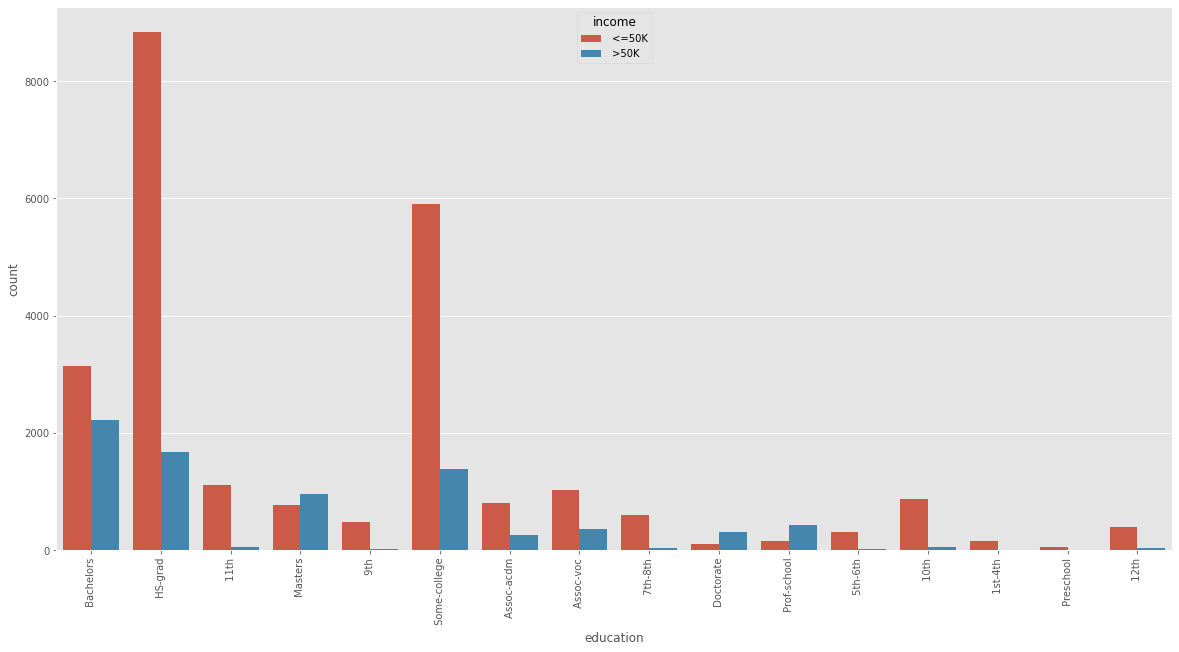

In [14]:
# Distribuição das classes por Nível de Escolaridade
plt.figure(figsize=(20,10))
sns.countplot(data=df, x = 'education',  hue = 'income')
plt.xticks(rotation=90);

In [15]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [16]:
# Verificando a menor e a maior jornada de trabalho.
print(df['hours-per-week'].min())
print(df['hours-per-week'].max())

1
99


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

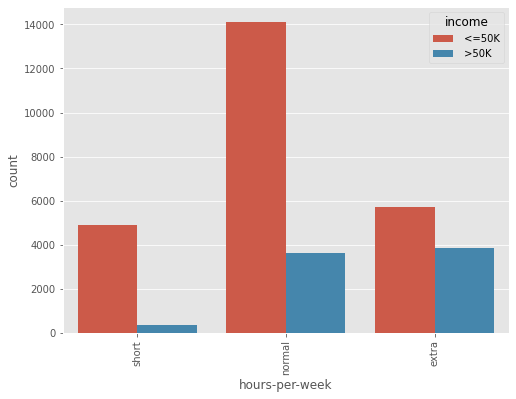

In [17]:
# Para uma melhor visualização vamos agrupar as horas trabalhadas em 3 categorias:
# 0-30 (jornada curta)
# 30-40 (jornada normal)
# 40-100 (jornada extra)

df['hours-per-week'] = pd.cut(df['hours-per-week'],[0,30,40,100], labels =['short','normal','extra'])

# Distribuição das classes por Horas trabalhadas
plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'hours-per-week',  hue = 'income')
plt.xticks(rotation=90)

In [18]:
df['hours-per-week'].value_counts()

normal    17735
extra      9581
short      5245
Name: hours-per-week, dtype: int64

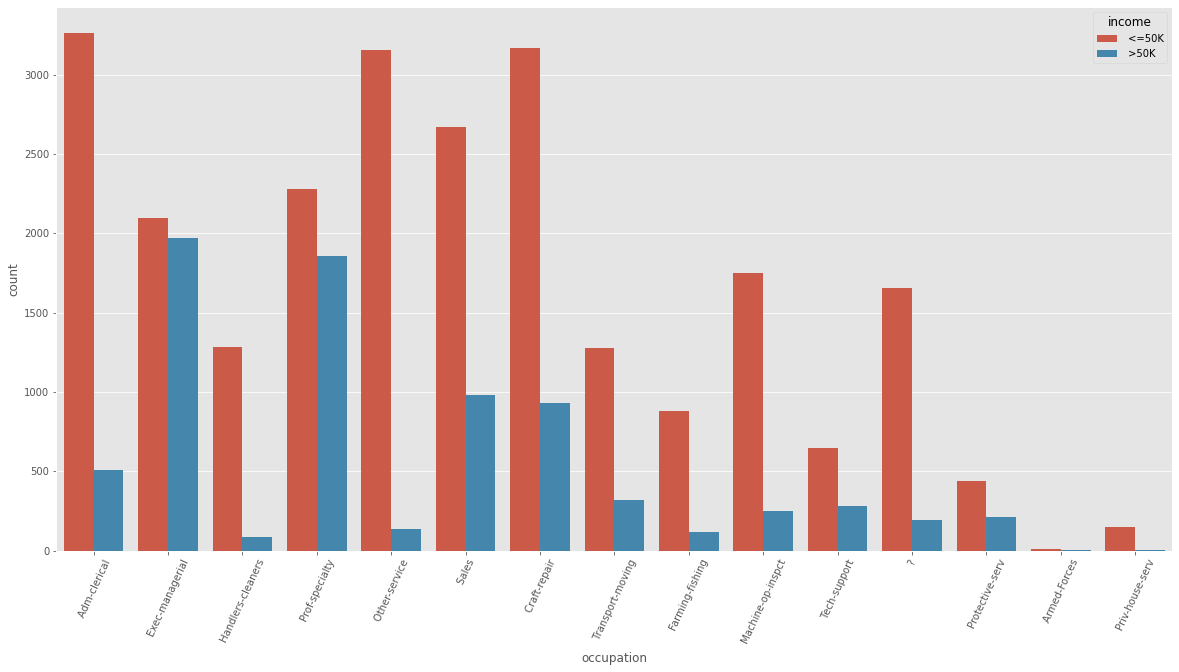

In [19]:
# Distribuição das classes de acordo com a ocupação
plt.figure(figsize=(20,10))
sns.countplot(data=df, x = 'occupation',  hue = 'income')
plt.xticks(rotation=65);

In [20]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

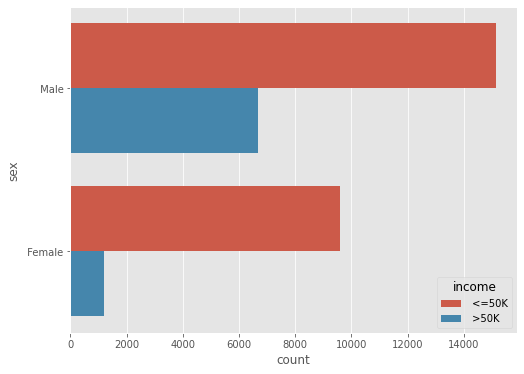

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(y="sex", hue='income', data=df)

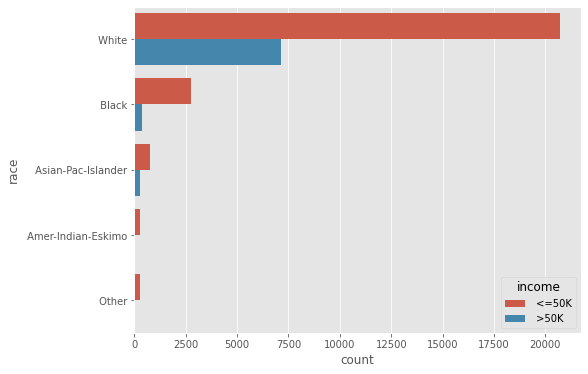

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(y="race", hue='income', data=df)

In [23]:
# Verificando a idade mínima e máxima do dataset.
print(f'A idade mínima é: {df.age.min()} anos')
print(f'A idade máxima é: {df.age.max()} anos')

A idade mínima é: 17 anos
A idade máxima é: 90 anos


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

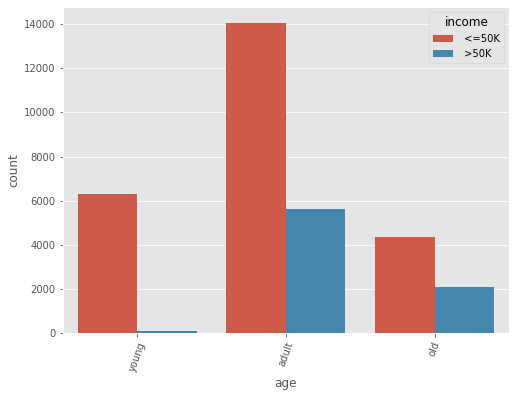

In [24]:
# Para uma melhor visualização vamos agrupar as idades em 3 categorias:
# 0-25 anos (jovens)
# 25-50 anos (adultos)
# 50-100 anos (idosos)
df['age'] = pd.cut(df['age'],[0,25,50,100], labels =['young','adult','old'])

# Verificando como ficou a distribuição.
plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'age',  hue = 'income')
plt.xticks(rotation=70)

####  <span style="color:Blue">  Verificação e Análise de Dados </span>
2) Faça uma análise e pre-processamento nos dados:

* **a)** Verifique se existem dados missing.
* **b)** Converta colunas categóricas para numéricas usando **LabelEnconder** ou **OneHotEnconder**.
* **c)** Explique qual técnica de conversão você usou e por quê.

**Como fazer?**

Para visualizar dados missing consulte o capítulo **Python para Análise de Dados**.

Para converter dados categóricos veja as seguintes aulas sobre LabelEncoder e One Hot Enconder no Capítulo de Machine Learning:
* **SVM - Criando um Classificador de Músicas do Spotify - Aula 07**

> Através do exemplo prático mostramos como funciona a técnica Label Encoding com suas vantagens e desvantagens e como aplicar na base de dados.

* **SVM - Processando Dados Categóricos com o One hot Enconding- Aula 08**
> Nesta aula você irá entender os conceitos do One Hot Encoding e as alterações que serão feitas na base de dados.

* **SVM - Aplicando o Get Dummies nos Dados - Aula 09**
> Por fim, na aula 09 aplicamos o One Hot Enconding na base de dados utilizando o método get_dummies() conforme cobrado no exemplo acima.

In [25]:
# Verificando a quantidade de valores nulos no dataset.
total = df.isnull().sum().sort_values(ascending=False)
percent = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
missing_data[missing_data['percent']!=0]

,total,percent


In [26]:


# Preenchendo os valores nulos da coluna 'workclass'.
top = 'Private'
df['workclass'] = df['workclass'].fillna(top)



In [27]:
# Preenchendo os valores nulos da coluna 'occupation'.
top = 'United-States'
df['occupation'] = df['occupation'].fillna(top)

In [28]:
# Preenchendo os valores nulos da coluna 'native-country'.
top = 'Prof-specialty'
df['native-country'] = df['native-country'].fillna(top)

In [29]:
# Verificando se ainda existem valores nulos no Dataset.
if df.isnull().sum().sort_values(ascending=False).any() != 0:
    print(f'Existe valores nulos no dataset? {True}')
else:
    print(f'Existe valores nulos no dataset? {False}')

Existe valores nulos no dataset? False


In [30]:


# Criando uma nova coluna com a renda final.
df['capital_last'] = df['capital-gain'] - df['capital-loss']



In [31]:
# Removendo as features irrelevantes.
# A coluna 'educational-num' está preenchida com o código referente a cada nível de escolaridade, dessa maneira podemos excluir a coluna 'education'.
# As colunas 'capital-gain' e 'capital-loss' estão representadas pela nova coluna que criamos anteriormente.
def remove_features(lista_features):
    for i in lista_features:
        df.drop(i, axis=1, inplace=True)
remove_features(['capital-gain','capital-loss','education'])


In [32]:
# Trasnformando as variáveis categóricas em numéricas.
cols = df[df.select_dtypes(['object']).columns]

for c in cols:
    encoding = LabelEncoder()
    encoding.fit(list(df[c].values))
    df[c] = encoding.transform(list(df[c].values))
df = pd.get_dummies(df)

In [33]:
df.head()

,workclass,fnlwgt,education-num,matital-status,occupation,relationship,race,sex,native-country,income,capital_last,age_young,age_adult,age_old,hours-per-week_short,hours-per-week_normal,hours-per-week_extra
0,7,77516,13,4,1,1,4,1,39,0,2174,0,1,0,0,1,0
1,6,83311,13,2,4,0,4,1,39,0,0,0,1,0,1,0,0
2,4,215646,9,0,6,1,4,1,39,0,0,0,1,0,0,1,0
3,4,234721,7,2,6,0,2,1,39,0,0,0,0,1,0,1,0
4,4,338409,13,2,10,5,2,0,5,0,0,0,1,0,0,1,0


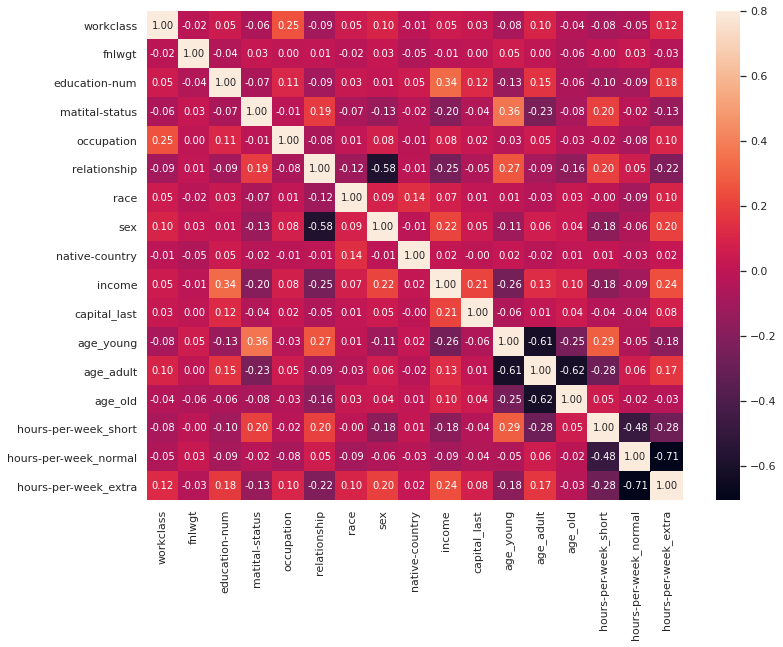

In [34]:
# Possibilita a análise simultânea da associação entre variáveis.
corr = df.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f')

In [35]:


corr_list = corr['income'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list



education-num            0.335154
hours-per-week_extra     0.244120
sex                      0.215980
capital_last             0.214428
age_adult                0.130379
age_old                  0.097687
occupation               0.075468
race                     0.071846
workclass                0.051604
native-country           0.015840
fnlwgt                  -0.009463
hours-per-week_normal   -0.092129
hours-per-week_short    -0.177816
matital-status          -0.199307
relationship            -0.250918
age_young               -0.258270
Name: income, dtype: float64

In [36]:


# Separando a classe dos Dados.
previsores = df.drop('income',axis=1)
classe = df['income']



In [37]:
clf=RandomForestClassifier(n_estimators=100, random_state=12)
clf.fit(previsores, classe)

RandomForestClassifier(random_state=7)

In [38]:


feature_imp = pd.Series(clf.feature_importances_,index=previsores.columns).sort_values(ascending=False)
feature_imp



fnlwgt                   0.304655
capital_last             0.161342
education-num            0.126835
relationship             0.099637
occupation               0.074124
matital-status           0.072238
workclass                0.044751
age_young                0.020445
native-country           0.019446
hours-per-week_extra     0.018301
race                     0.016100
sex                      0.012766
hours-per-week_short     0.008611
age_adult                0.007251
age_old                  0.007123
hours-per-week_normal    0.006374
dtype: float64

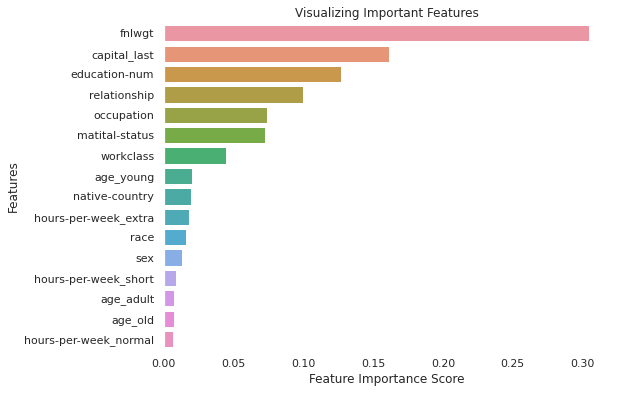

In [39]:


plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()



In [40]:
# Selecionando as features de maior importância.
features_selected = []
for feature,importance in feature_imp.iteritems():
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)

fnlwgt: 30%
capital_last: 16%
education-num: 13%
relationship: 10%
occupation: 7%
matital-status: 7%
workclass: 4%


In [41]:
# Treinando os modelos utilizando apenas as features selecionadas.
previsores = df[features_selected]
classe = df['income']

In [42]:
# Criando modelo de Machine Learning a partir de cada algoritmo
# Os dados estão em diferentes escalas e isso pode prejudicar a performance de alguns algoritmos.
# Vamos aplicar a  Padronização ao conjunto de dados (colocando-os na mesma escala).
# Nesta técnica, os dados serão transformados de modo que estejam com uma distribuição normal, com média igual a zero e
# desvio padrão igual a 1.

# Não utilizarei o modelo SVC, pois ele não funciona bem quando temos um grande conjunto de dados
# porque o tempo de treinamento necessário é maior. 

pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))),
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))),
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())]))),
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))),
#pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in pipelines:
    kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)
    cross_val_result = model_selection.cross_val_score(modelo, 
                                                     previsores, 
                                                     classe, 
                                                     cv = kfold, 
                                                     scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: 0.818249 (0.004986)
Scaled-KNN: 0.826510 (0.002347)
Scaled-CART: 0.807838 (0.003671)
Scaled-NB: 0.802862 (0.002790)
Scaled-RF: 0.828199 (0.005611)


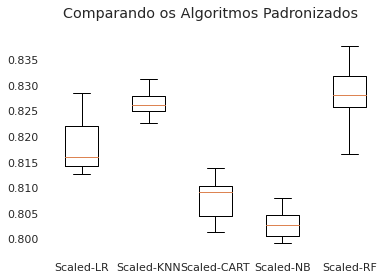

In [43]:
# De acordo com os resultados anteriores, os modelos criados com DecisionTree e Random Forest apresentaram 
# os melhores valores de acurácia e portanto os melhores resultados.
# Isso pode ser confirmado, comparando os algoritmos através de boxplots.
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [44]:
# Embora o Random Forest tenha apresentado a menor taxa de erro após a padronização dos dados, podemos ainda otimizá-lo
# com o ajuste dos parâmetros.

# # Definindo a escala
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# Possíveis valores de estimators
val_estimators = [20, 50, 100, 150, 200]

# Possíveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']

# Definindo um dicionário que recebe as listas de parâmetros e valores
parametros_grid = dict(n_estimators = val_estimators,
                       criterion = val_criterion)
                      
                       
# Criando o modelo
modelo_random = RandomForestClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)

# Testando diferenets combinações com os parâmetros
grid = RandomizedSearchCV(estimator = modelo_random, param_distributions = parametros_grid, cv = kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

# Print do resultado
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.82863,std:0.00515,params:{'n_estimators': 20, 'criterion': 'gini'}
mean:0.82974,std:0.00714,params:{'n_estimators': 50, 'criterion': 'gini'}
mean:0.82924,std:0.00632,params:{'n_estimators': 100, 'criterion': 'gini'}
mean:0.82863,std:0.00602,params:{'n_estimators': 150, 'criterion': 'gini'}
mean:0.82897,std:0.0057,params:{'n_estimators': 200, 'criterion': 'gini'}
mean:0.82977,std:0.00493,params:{'n_estimators': 20, 'criterion': 'entropy'}
mean:0.82937,std:0.00533,params:{'n_estimators': 50, 'criterion': 'entropy'}
mean:0.8294,std:0.0061,params:{'n_estimators': 100, 'criterion': 'entropy'}
mean:0.82869,std:0.00591,params:{'n_estimators': 150, 'criterion': 'entropy'}
mean:0.82927,std:0.00629,params:{'n_estimators': 200, 'criterion': 'entropy'}

Melhor parâmetro:{'n_estimators': 20, 'criterion': 'entropy'}, Score:0.8297657417514648


In [45]:
# Vamos agora ajustar os parâmeros do DecisionTree.

# Definindo a escala
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# Definindo a profundidade máxima da árvore.
max_depth = list(range(1, 31))

# Possíveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']


# Definindo um dicionário que recebe as listas de parâmetros e valores
valores_grid = dict(criterion = val_criterion,
                    max_depth = max_depth)

# Criando o modelo
tree = DecisionTreeClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)

# Testando diferenets combinações com os valores de K
grid = RandomizedSearchCV(estimator = tree, param_distributions = valores_grid, cv = kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

# Print do resultado  
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.827,std:0.00401,params:{'max_depth': 24, 'criterion': 'entropy'}
mean:0.81991,std:0.00282,params:{'max_depth': 29, 'criterion': 'entropy'}
mean:0.85314,std:0.00222,params:{'max_depth': 10, 'criterion': 'gini'}
mean:0.8505,std:0.00402,params:{'max_depth': 13, 'criterion': 'gini'}
mean:0.82823,std:0.00474,params:{'max_depth': 20, 'criterion': 'gini'}
mean:0.85037,std:0.00441,params:{'max_depth': 5, 'criterion': 'gini'}
mean:0.84392,std:0.0048,params:{'max_depth': 16, 'criterion': 'entropy'}
mean:0.83007,std:0.00528,params:{'max_depth': 23, 'criterion': 'entropy'}
mean:0.8532,std:0.00386,params:{'max_depth': 6, 'criterion': 'gini'}
mean:0.85228,std:0.00278,params:{'max_depth': 12, 'criterion': 'gini'}

Melhor parâmetro:{'max_depth': 6, 'criterion': 'gini'}, Score:0.8531987331764734


In [46]:
# Preparando a versão final do modelo.
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
modelo_tree = DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=12)
modelo_tree.fit(previsores,classe)
result_tree = cross_val_predict(modelo_tree,previsores, classe, cv=10)

print(f'Acurácia: {accuracy_score(classe,result_tree)}')
print('\n',confusion_matrix(classe,result_tree))
print('\n',classification_report(classe,result_tree))

Acurácia: 0.8509873775375449

 [[23130  1590]
 [ 3262  4579]]

               precision    recall  f1-score   support

           0       0.88      0.94      0.91     24720
           1       0.74      0.58      0.65      7841

    accuracy                           0.85     32561
   macro avg       0.81      0.76      0.78     32561
weighted avg       0.84      0.85      0.84     32561



In [47]:
#filename = 'model_final.sav'
pickle.dump(modelo_tree, open('modelo.sav', 'wb'))
pickle.load(open('modelo.sav', 'rb'))

DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=7)

####  <span style="color:Blue">  Pré-processamento de Dados </span>

3) Faça um pré-processamento nos dados antes de aplicar os algoritmos de Machine learning.

* **a)** Aplique algum padronizador ou normalizador nos dados numéricos.
* **b)** Explique qual técnica você usou e por quê.

**Como Fazer?**

Nesta etapa são feitas transformações nos atributos númericos para evitar que os algoritmos de Machine Learning sofram com diferentes escalas de valores e produzam resultados ruins.

Explicamos essas tranformações em detalhes no capítulo **Pré-Processamento de Dados**. 

Aprendemos o funcionamento e aplicação do **MinMax Scaler**, **Standard Scaler**, **Normalizer** etc.

Assista essas aulas e aplique alguma das técnicas citadas acima.

####  <span style="color:Blue">  Classificação e Avaliação de Modelos </span>

4) Treine pelo menos dois algoritmos supervisionados voltados para tarefas de classificação.

* **a)** Avalie os modelos separando os dados de **treino** e **teste** (use train_test_split).
* **b)** Avalie os modelos usando **Cross Validation** (Crie uma função para repetir menos código).
* **c)** Explique a diferença entre de cada uma das abordagens acima com suas vantagens e desvantagens.
* **d)** Imprima os resultados para cada modelo e abordagem de avaliação utilizando as métricas **Precisão**, **Recall** e **F1 Score**.

**Como fazer?**

Todos os requisitos necessários para completar as etapas dessa tarefa se encontram no capítulo de Machine Learning.

Para o entendimento completo das **Técnicas de Avaliação de Modelos** cobradas, veja as aulas:
* **Machine Learning  - Métricas de Avaliação de Modelos** 
* **Machine Learning  - Entendendo o que é a Matriz de Confusão**.

####  <span style="color:Blue"> Tunning do Modelo </span>

5) Faça um Tunning dos modelos e verifique o melhor resultado.

* Defina os melhores Hyperparametros para os algoritmos utilizando o GridSearch.
* Implemente usando Pipelines.
* Avalie os modelos usando **Cross Validation** (Utilize o recuso já integrado ao Pipeline).

**Como fazer?**

Consulte o capítulo **Machine Learning** e utilize o recurso de **GridSearch**.

Veja as aulas sobre **Pipelines** e **Métricas de Avaliação de Modelos**.

* **Dúvidas?**

Deixe um comentário aqui nessa aula. 